In [52]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting with Twitter API

In [3]:
%run ./keys.ipynb
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Political Sentiment:
- Dataframes of tweets of each party. 
- Dataframes of mentions of users for each party. 

- Machine learning for evalutating the sentiment of tweets and mentions.

## 1. PARTIDO POPULAR

In [4]:
# last 100 tweets of PP
pp_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='populares',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

In [5]:
pp_json_response = [tweet._json for tweet in pp_tweets]
df_pp_alltweets = pd.json_normalize(pp_json_response)

In [6]:
# numerical columns pp
df_pp_alltweets.describe()

,id,retweet_count,favorite_count,user.id,user.followers_count,user.friends_count,user.listed_count,user.favourites_count,user.statuses_count,retweeted_status.id,...,quoted_status.user.utc_offset,quoted_status.user.time_zone,quoted_status.user.statuses_count,quoted_status.user.lang,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.retweet_count,quoted_status.favorite_count
count,1.000000e+02,100.00000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,4.000000e+01,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
mean,1.380273e+18,378.31000,213.900000,20509689.0,820324.0,5295.0,4895.0,44481.0,101986.0,1.380255e+18,...,NaN,NaN,615998.0,NaN,NaN,NaN,NaN,NaN,7.0,9.0
std,2.632698e+14,1123.88569,555.549896,0.0,0.0,0.0,0.0,0.0,0.0,2.943270e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.379777e+18,8.00000,0.000000,20509689.0,820324.0,5295.0,4895.0,44481.0,101986.0,1.379826e+18,...,NaN,NaN,615998.0,NaN,NaN,NaN,NaN,NaN,7.0,9.0
25%,1.380078e+18,59.50000,0.000000,20509689.0,820324.0,5295.0,4895.0,44481.0,101986.0,1.380011e+18,...,NaN,NaN,615998.0,NaN,NaN,NaN,NaN,NaN,7.0,9.0
50%,1.380250e+18,114.00000,74.500000,20509689.0,820324.0,5295.0,4895.0,44481.0,101986.0,1.380208e+18,...,NaN,NaN,615998.0,NaN,NaN,NaN,NaN,NaN,7.0,9.0
75%,1.380485e+18,221.50000,158.250000,20509689.0,820324.0,5295.0,4895.0,44481.0,101986.0,1.380545e+18,...,NaN,NaN,615998.0,NaN,NaN,NaN,NaN,NaN,7.0,9.0
max,1.380793e+18,10046.00000,4072.000000,20509689.0,820324.0,5295.0,4895.0,44481.0,101986.0,1.380766e+18,...,NaN,NaN,615998.0,NaN,NaN,NaN,NaN,NaN,7.0,9.0


In [17]:
df_pp_alltweets.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang
0,Sat Apr 10 08:01:59 +0000 2021,1380793164752109569,1380793164752109569,Más del 49% de los madrileños prefieren a @Idi...,False,"[0, 134]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Apr 10 07:54:29 +0000 2021,1380791280138027010,1380791280138027010,RT @anadebande: Casi la mitad de los 209 terro...,False,"[0, 139]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# now, we select just the columns that are important for our analysis:

columns_selected = ['created_at', 'id', 'full_text','retweeted_status.full_text', 'display_text_range', 
                    'source', 'retweet_count', 'favorite_count', 'user.followers_count', 
                    'user.friends_count', 'user.statuses_count', 'entities.hashtags', 'entities.urls']

In [137]:
df_pp = df_pp_alltweets[columns_selected]

In [138]:
df_pp

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 08:01:59 +0000 2021,1380793164752109569,Más del 49% de los madrileños prefieren a @Idi...,NaN,"[0, 134]","<a href=""http://twitter.com/download/iphone"" r...",73,176,820324,5295,101986,[],"[{'url': 'https://t.co/l3RvR3n8RU', 'expanded_..."
1,Sat Apr 10 07:54:29 +0000 2021,1380791280138027010,RT @anadebande: Casi la mitad de los 209 terro...,Casi la mitad de los 209 terroristas acercados...,"[0, 139]","<a href=""http://twitter.com/download/iphone"" r...",229,0,820324,5295,101986,"[{'text': 'Marlaska', 'indices': [126, 135]}]",[]
2,Sat Apr 10 05:57:13 +0000 2021,1380761769979838464,"Buenos días y #FelizSábado a todos, aquí os de...",NaN,"[0, 112]","<a href=""http://twitter.com/download/iphone"" r...",9,18,820324,5295,101986,"[{'text': 'FelizSábado', 'indices': [14, 26]}]","[{'url': 'https://t.co/3quq6ixg6u', 'expanded_..."
3,Fri Apr 09 20:34:16 +0000 2021,1380620095572033539,RT @pablocasado_: Exigimos la convocatoria inm...,Exigimos la convocatoria inmediata de la Confe...,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",209,0,820324,5295,101986,[],[]
4,Fri Apr 09 20:24:04 +0000 2021,1380617532189642755,RT @TeoGarciaEgea: En Angola a favor de los co...,"En Angola a favor de los colegios religiosos, ...","[0, 92]","<a href=""http://twitter.com/download/iphone"" r...",471,0,820324,5295,101986,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wed Apr 07 18:13:37 +0000 2021,1379859924268765187,RT @FundacionCyL: Mañana 8 de abril a las 10.0...,Mañana 8 de abril a las 10.00h celebramos una ...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",20,0,820324,5295,101986,"[{'text': 'sanidad', 'indices': [89, 97]}]",[]
96,Wed Apr 07 17:00:57 +0000 2021,1379841637917069314,RT @abeltran_ana: Celebraremos en mayo y junio...,Celebraremos en mayo y junio los congresos de ...,"[0, 139]","<a href=""https://mobile.twitter.com"" rel=""nofo...",60,0,820324,5295,101986,[],[]
97,Wed Apr 07 16:10:56 +0000 2021,1379829051955757059,RT @pablocasado_: Me he reunido con el nuevo p...,Me he reunido con el nuevo presidente del @rie...,"[0, 139]","<a href=""https://about.twitter.com/products/tw...",128,0,820324,5295,101986,[],[]
98,Wed Apr 07 12:47:13 +0000 2021,1379777783828725768,💬 El Plan de Medidas frente a la #despoblación...,NaN,"[0, 183]","<a href=""https://mobile.twitter.com"" rel=""nofo...",41,58,820324,5295,101986,"[{'text': 'despoblación', 'indices': [33, 46]}]","[{'url': 'https://t.co/1llObv5AB8', 'expanded_..."


In [182]:
def cleaning_dates(column):
    
    list_dates = list(column)

    for date in list_dates:
        date_split = date.split(' ')

    return date_split

In [183]:
cleaning_dates(df_pp['created_at'])

['Wed', 'Apr', '07', '12:44:52', '+0000', '2021']

In [213]:
list_column = df_pp['created_at'].tolist()
import re
for date in list_column:
    list_dates = re.split(r' ', date)

In [217]:
for date in list_column:
    print(date)

Sat Apr 10 08:01:59 +0000 2021
Sat Apr 10 07:54:29 +0000 2021
Sat Apr 10 05:57:13 +0000 2021
Fri Apr 09 20:34:16 +0000 2021
Fri Apr 09 20:24:04 +0000 2021
Fri Apr 09 20:03:06 +0000 2021
Fri Apr 09 19:56:34 +0000 2021
Fri Apr 09 19:55:58 +0000 2021
Fri Apr 09 19:53:45 +0000 2021
Fri Apr 09 19:21:18 +0000 2021
Fri Apr 09 19:15:09 +0000 2021
Fri Apr 09 18:45:51 +0000 2021
Fri Apr 09 18:29:51 +0000 2021
Fri Apr 09 18:13:59 +0000 2021
Fri Apr 09 17:25:57 +0000 2021
Fri Apr 09 16:12:12 +0000 2021
Fri Apr 09 15:48:10 +0000 2021
Fri Apr 09 13:16:30 +0000 2021
Fri Apr 09 12:25:50 +0000 2021
Fri Apr 09 12:01:26 +0000 2021
Fri Apr 09 11:55:19 +0000 2021
Fri Apr 09 11:53:49 +0000 2021
Fri Apr 09 11:44:44 +0000 2021
Fri Apr 09 11:42:53 +0000 2021
Fri Apr 09 11:40:45 +0000 2021
Fri Apr 09 11:35:27 +0000 2021
Fri Apr 09 11:32:22 +0000 2021
Fri Apr 09 11:30:37 +0000 2021
Fri Apr 09 11:23:10 +0000 2021
Fri Apr 09 11:11:18 +0000 2021
Fri Apr 09 11:10:15 +0000 2021
Fri Apr 09 11:05:05 +0000 2021
Fri Apr 

In [215]:
list_dates

['Wed', 'Apr', '07', '12:44:52', '+0000', '2021']

ValueError: Could not interpret value `create_at` for parameter `x`

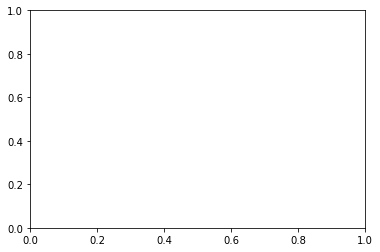

In [89]:
# visualization
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=df_pp, x='create_at', y='retweet_count')

## 2. PSOE

In [32]:
# last 100 tweets of PSOE
psoe_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='psoe',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

In [33]:
psoe_json_response = [tweet._json for tweet in psoe_tweets]
df_psoe_alltweets = pd.json_normalize(psoe_json_response)

In [38]:
df_psoe_alltweets[columns_selected].head()

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:06:00 +0000 2021,1380809276000702469,🙋🏻‍♀️No te pierdas el Acto sobre Feminismo hoy...,NaN,"[0, 264]","<a href=""https://studio.twitter.com"" rel=""nofo...",8,8,822067,13447,120021,"[{'text': 'GobernarEnSerio', 'indices': [247, ...","[{'url': 'https://t.co/zTSjqzAlvn', 'expanded_..."
1,Sat Apr 10 08:05:30 +0000 2021,1380794052426219520,❌Condenamos los actos vandálicos a la sede del...,NaN,"[0, 229]","<a href=""http://twitter.com/download/iphone"" r...",49,72,822067,13447,120021,[],"[{'url': 'https://t.co/ADTPcFz4xf', 'expanded_..."
2,Sat Apr 10 08:01:00 +0000 2021,1380792918374412291,Avanzar en una economía descarbonizada y segur...,NaN,"[0, 274]","<a href=""https://studio.twitter.com"" rel=""nofo...",24,42,822067,13447,120021,"[{'text': 'AmbiciónClimática', 'indices': [254...",[]
3,Sat Apr 10 07:49:54 +0000 2021,1380790124158582785,RT @equipoGabilondo: 📌 Hoy hablamos de #Femini...,📌 Hoy hablamos de #Feminismo en un acto que ce...,"[0, 139]","<a href=""http://twitter.com/download/iphone"" r...",72,0,822067,13447,120021,"[{'text': 'Feminismo', 'indices': [39, 49]}]",[]
4,Sat Apr 10 07:33:00 +0000 2021,1380785871696367618,🙋🏻‍♀️No te pierdas el Acto sobre Feminismo hoy...,NaN,"[0, 275]","<a href=""https://studio.twitter.com"" rel=""nofo...",51,74,822067,13447,120021,"[{'text': 'GobernarEnSerio', 'indices': [258, ...",[]


## 3. PODEMOS

In [35]:
# last 100 tweets of PODEMOS
podemos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='podemos',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

podemos_json_response = [tweet._json for tweet in podemos_tweets]
df_podemos_alltweets = pd.json_normalize(podemos_json_response)

In [37]:
df_podemos_alltweets[columns_selected].head()

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:00:00 +0000 2021,1380807766760062979,"Frente a su violencia, su odio y sus mentiras,...",NaN,"[0, 71]","<a href=""https://studio.twitter.com"" rel=""nofo...",45,95,1525117,19967,118542,"[{'text': 'QueHableLaMayoría', 'indices': [47,...",[]
1,Sat Apr 10 08:58:25 +0000 2021,1380807368032849924,RT @PodemosGetafe: Basta ya del abandono de nu...,Basta ya del abandono de nuestros colegios y h...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",41,0,1525117,19967,118542,[],[]
2,Sat Apr 10 08:58:16 +0000 2021,1380807332683190272,RT @PodemosMostoles: Porque defender los #Serv...,Porque defender los #ServiciosPublicos es la b...,"[0, 140]","<a href=""https://about.twitter.com/products/tw...",28,0,1525117,19967,118542,"[{'text': 'ServiciosPublicos', 'indices': [41,...",[]
3,Sat Apr 10 08:55:24 +0000 2021,1380806611392991235,"RT @IdoiaVR: Porque somos muchos y muchas más,...","Porque somos muchos y muchas más, el #4M parti...","[0, 140]","<a href=""https://about.twitter.com/products/tw...",34,0,1525117,19967,118542,"[{'text': '4M', 'indices': [50, 53]}, {'text':...",[]
4,Sat Apr 10 08:50:00 +0000 2021,1380805249443581953,El 4 de mayo será tu voz la que se escuche. \n...,NaN,"[0, 64]","<a href=""https://about.twitter.com/products/tw...",54,91,1525117,19967,118542,"[{'text': 'QueHableLaMayoría', 'indices': [46,...",[]


## 4. CUIDADANOS

In [39]:
# last 100 tweets of Ciudadanos
ciudadanos_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='ciudadanoscs',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

ciudadanos_json_response = [tweet._json for tweet in ciudadanos_tweets]
df_ciudadanos_alltweets = pd.json_normalize(ciudadanos_json_response)

In [40]:
df_ciudadanos_alltweets[columns_selected].head(3)

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 09:13:16 +0000 2021,1380811106793496577,Cuando Cs habla de sensatez y diálogo nos cree...,NaN,"[0, 253]","<a href=""https://studio.twitter.com"" rel=""nofo...",0,0,521536,89295,174910,"[{'text': 'MadrileñosPorEdmundoBal', 'indices'...",[]
1,Sat Apr 10 09:10:41 +0000 2021,1380810457070592008,💪🍊 Para el #4M necesitamos mucha ilusión y esf...,NaN,"[0, 219]","<a href=""https://studio.twitter.com"" rel=""nofo...",3,1,521536,89295,174910,"[{'text': '4M', 'indices': [11, 14]}, {'text':...",[]
2,Sat Apr 10 09:06:39 +0000 2021,1380809442397200386,Madrid\n\n🏍 Es dinámica y moderna.\n🏃‍♂️ Es es...,NaN,"[0, 273]","<a href=""https://studio.twitter.com"" rel=""nofo...",32,35,521536,89295,174910,"[{'text': 'MadrileñosPorEdmundoBal', 'indices'...",[]


## 5. VOX

In [41]:
# last 100 tweets of VOX
vox_tweets = [tweet for tweet in tweepy.Cursor(api.user_timeline,
                                           screen_name='vox_es',
                                           tweet_mode='extended',
                                           exclude_replies=True).items(100)]

vox_json_response = [tweet._json for tweet in vox_tweets]
df_vox_alltweets = pd.json_normalize(vox_json_response)

In [42]:
df_vox_alltweets[columns_selected].head(3)

,created_at,id,full_text,retweeted_status.full_text,display_text_range,source,retweet_count,favorite_count,user.followers_count,user.friends_count,user.statuses_count,entities.hashtags,entities.urls
0,Sat Apr 10 08:31:41 +0000 2021,1380800638989316097,RT @eldisidenteOK: El testimonio de un obrero ...,El testimonio de un obrero emocionado que vivi...,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",603,0,438096,1255,55231,[],[]
1,Sat Apr 10 08:25:59 +0000 2021,1380799204780601344,RT @Santi_ABASCAL: #SanFernandoDeHenaresEnPie\...,#SanFernandoDeHenaresEnPie\nSan Fernando de He...,"[0, 129]","<a href=""http://twitter.com/download/iphone"" r...",264,0,438096,1255,55231,"[{'text': 'SanFernandoDeHenaresEnPie', 'indice...",[]
2,Sat Apr 10 08:18:39 +0000 2021,1380797362860343297,RT @Igarrigavaz: VOX comienza su ofensiva para...,VOX comienza su ofensiva para fiscalizar TV3 y...,"[0, 113]","<a href=""http://twitter.com/download/iphone"" r...",1346,0,438096,1255,55231,[],"[{'url': 'https://t.co/70et558epG', 'expanded_..."
